In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = np.loadtxt('/home/brianbg/Documents/ML2023/olympic100m_men.txt', delimiter=',').T

In [3]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def derivative(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    derivative = (1/m) * (X.T.dot(predictions - y))
    return derivative

In [34]:
def gradient_descent(X, y, theta, learning_rate=0.005, iterations=10000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        theta = theta - learning_rate * derivative(X, y, theta)
        theta_history[it,:] = theta
        cost_history[it] = cost_function(X, y, theta)
    return theta, cost_history, theta_history

In [35]:
x = (data[0] - 1896)/4
y = data[1]

X = np.c_[np.ones((len(x),1)),x]
theta = np.random.randn(2)
print(theta)

theta, cost_history, theta_history = gradient_descent(X, y, theta)

[ 0.13619299 -1.08941974]


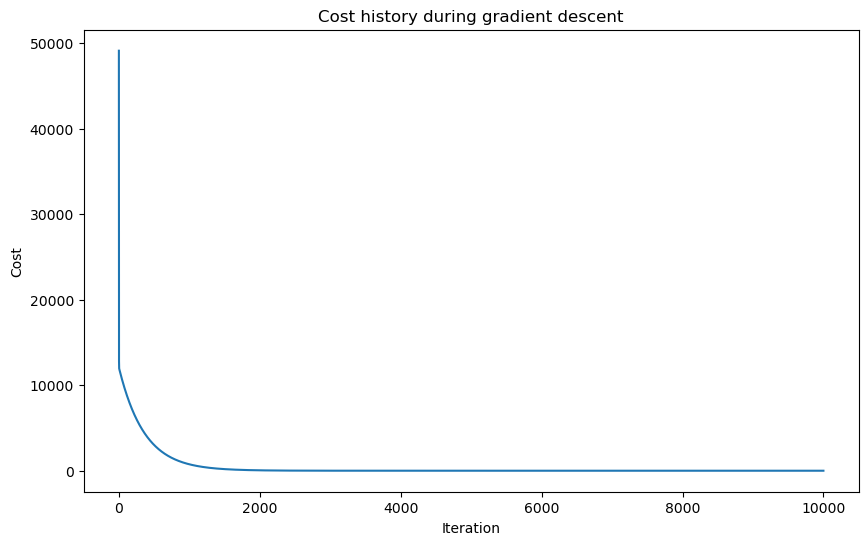

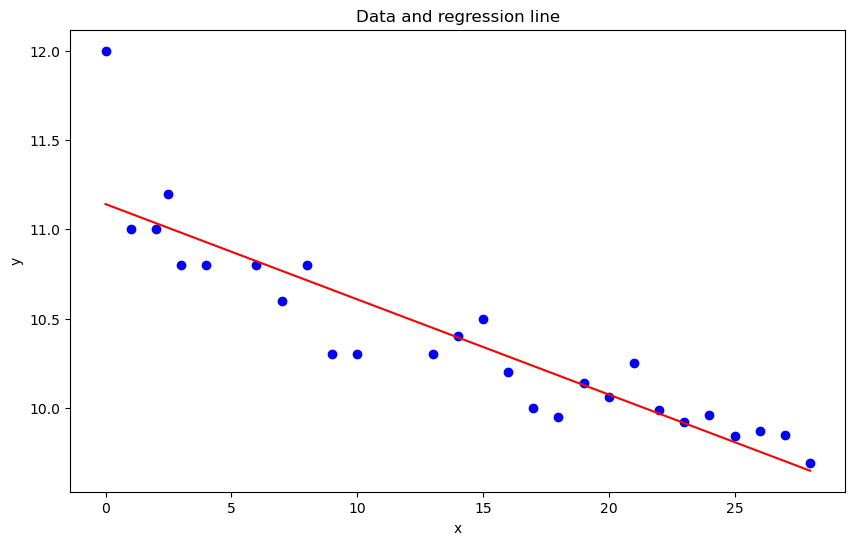

In [37]:
# Plot the cost history
plt.figure(figsize=(10,6))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost history during gradient descent')
plt.show()

# Plot the final regression line
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue')
plt.plot(x, X @ theta, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and regression line')
plt.show()